In [240]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Wall time: 0 ns


In [162]:
df = pd.read_csv('Copy of Sales_data.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [164]:
print(str(round(((df.isnull().sum()/df.shape[0])*100),2)),end='\n')

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64


In [165]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [166]:
df['Outlet_Size'].value_counts().sum()

6113

In [167]:
df.shape[0]-6113

2410

In [168]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [169]:
df['Item_Identifier'].nunique()

1559

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [171]:
df['Item_Weight'].dtype

dtype('float64')

In [172]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [173]:
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(lambda x:x.lower())

In [174]:
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(lambda x:x[:3])

In [175]:
df['Item_Fat_Content'].replace({'lf':'low'},inplace=True)

In [176]:
df['Item_Fat_Content'].value_counts()

low    5517
reg    3006
Name: Item_Fat_Content, dtype: int64

In [177]:
df['Item_Fat_Content'].replace({'low':0,'reg':1},inplace=True)

In [178]:
df['Item_Fat_Content'].unique()

array([0, 1], dtype=int64)

In [179]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:>

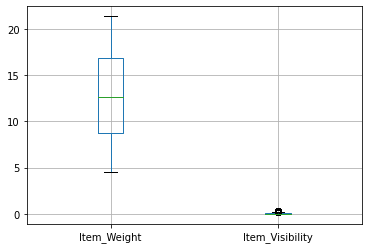

In [180]:
df[['Item_Weight','Item_Visibility']].boxplot()

<AxesSubplot:>

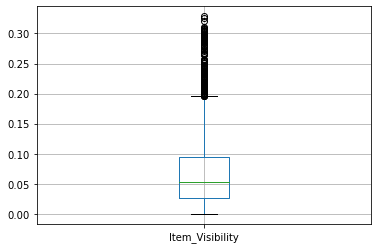

In [181]:
df[['Item_Visibility']].boxplot()

In [182]:
df['Item_Visibility'].loc[df['Item_Visibility']>0.2] = df.loc[(df['Item_Visibility']<0.2)]['Item_Visibility'].median()

In [183]:
df['Item_Visibility'].loc[df['Item_Visibility']>0.2]

Series([], Name: Item_Visibility, dtype: float64)

In [184]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [185]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [186]:
df['Outlet_Location_Type']=df['Outlet_Location_Type'].apply(lambda x:int(x[-1]))

In [187]:
df['Outlet_Location_Type'].dtype

dtype('int64')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 799.2+ KB


In [189]:
df.drop('Outlet_Size',axis=1,inplace=True)

In [190]:
df['Outlet_Identifier']=df['Outlet_Identifier'].apply(lambda x: int(x[-3:]))

In [191]:
df['Outlet_Identifier'].unique()

array([49, 18, 10, 13, 27, 45, 17, 46, 35, 19], dtype=int64)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   int64  
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 732.6+ KB


In [193]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [194]:
df['Item_Type']=np.where(((df['Item_Type']=='Soft Drinks')|(df['Item_Type']=='Hard Drinks')),'Drinks',df['Item_Type'])

In [195]:
df['Item_Type']=np.where(((df['Item_Type']=='Snack Foods')|(df['Item_Type']=='Frozen Foods')|(df['Item_Type']=='Starchy Foods')|(df['Item_Type']=='Seafood')),'Foods',df['Item_Type'])

In [196]:
df['Item_Type'].nunique()

12

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   int64  
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 732.6+ KB


In [198]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [199]:
df['Outlet_Type']=df['Outlet_Type'].apply(lambda x:0 if x[-1]=='e' else int(x[-1]))

In [200]:
df['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   int64  
 9   Outlet_Type                8523 non-null   int64  
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(5), object(2)
memory usage: 732.6+ KB


In [202]:
df['Item_Identifier'].apply(lambda x:x[:3]).unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

In [203]:
df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [204]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,49,1999,1,1,3735.1380
1,DRC01,5.920,1,0.019278,Drinks,48.2692,18,2009,3,2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,49,1999,1,1,2097.2700
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,10,1998,3,0,732.3800
4,NCD19,8.930,0,0.000000,Household,53.8614,13,1987,3,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Foods,214.5218,13,1987,3,1,2778.3834
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,45,2002,2,1,549.2850
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,35,2004,2,1,1193.1136
8521,FDN46,7.210,1,0.145221,Foods,103.1332,18,2009,3,2,1845.5976


In [205]:
df.groupby('Item_Identifier').get_group('DRC01')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.92,1,0.019278,Drinks,48.2692,18,2009,3,2,443.4228
2272,DRC01,5.92,1,0.019309,Drinks,49.0692,17,2007,2,1,1478.0760
2927,DRC01,NaN,1,0.019107,Drinks,48.4692,27,1985,3,3,1034.6532
5029,DRC01,5.92,1,0.019239,Drinks,49.8692,45,2002,2,1,1133.1916
5077,DRC01,5.92,1,0.019200,Drinks,47.7692,46,1997,1,1,492.6920
5218,DRC01,5.92,1,0.019184,Drinks,50.3692,13,1987,3,1,591.2304


In [206]:
df.groupby('Item_Type').get_group('Drinks')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,1,0.019278,Drinks,48.2692,18,2009,3,2,443.4228
18,DRI11,NaN,0,0.034238,Drinks,113.2834,27,1985,3,3,2303.6680
27,DRJ59,11.650,0,0.019356,Drinks,39.1164,13,1987,3,1,308.9312
34,DRH01,17.500,0,0.097904,Drinks,174.8738,46,1997,1,1,2085.2856
37,DRZ11,8.850,1,0.113124,Drinks,122.5388,18,2009,3,2,1609.9044
...,...,...,...,...,...,...,...,...,...,...,...
8484,DRJ49,6.865,0,0.000000,Drinks,129.9652,13,1987,3,1,2324.9736
8485,DRK37,NaN,0,0.043792,Drinks,189.0530,27,1985,3,3,6261.8490
8487,DRG13,NaN,0,0.037006,Drinks,164.7526,27,1985,3,3,4111.3150
8506,DRF37,17.250,0,0.084676,Drinks,263.1910,18,2009,3,2,3944.8650


In [207]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [208]:
df['Item_Identifier'].apply(lambda x:x[:3]).unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

In [209]:
df['II_dummy']=df['Item_Identifier'].apply(lambda x:x[:3])

In [210]:
df[['Item_Identifier','II_dummy']]

,Item_Identifier,II_dummy
0,FDA15,FDA
1,DRC01,DRC
2,FDN15,FDN
3,FDX07,FDX
4,NCD19,NCD
...,...,...
8518,FDF22,FDF
8519,FDS36,FDS
8520,NCJ29,NCJ
8521,FDN46,FDN


In [211]:
a=0
for name,subdf in df.groupby('II_dummy'):
#     display(name,subdf)
    df.II_dummy=df.II_dummy.replace(name,a)
    a+=1

In [212]:
df['II_dummy'].nunique()

71

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   int64  
 9   Outlet_Type                8523 non-null   int64  
 10  Item_Outlet_Sales          8523 non-null   float64
 11  II_dummy                   8523 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 799.2+ KB


In [214]:
df[['Item_Identifier','II_dummy']]

,Item_Identifier,II_dummy
0,FDA15,19
1,DRC01,2
2,FDN15,32
3,FDX07,42
4,NCD19,48
...,...,...
8518,FDF22,24
8519,FDS36,37
8520,NCJ29,54
8521,FDN46,32


In [215]:
df['II_dummy']=df['II_dummy'].astype('str')

In [216]:
df['Item_Identifier']=df['Item_Identifier'].apply(lambda x:x[-2:])

In [217]:
df['Item_new']=df['II_dummy']+df['Item_Identifier']

In [218]:
df['Item_new']

0       1915
1        201
2       3215
3       4207
4       4819
        ... 
8518    2422
8519    3736
8520    5429
8521    3246
8522     601
Name: Item_new, Length: 8523, dtype: object

In [219]:
df.Item_new=df.Item_new.astype('int')

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   int64  
 9   Outlet_Type                8523 non-null   int64  
 10  Item_Outlet_Sales          8523 non-null   float64
 11  II_dummy                   8523 non-null   object 
 12  Item_new                   8523 non-null   int32  
dtypes: float64(4), int32(1), int64(5), object(3)
mem

In [221]:
df.drop(['Item_Identifier','II_dummy'],axis=1,inplace=True)


In [222]:
df.rename(columns={'Item_new':'Item_ID'},inplace=True)

In [223]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID
0,9.300,0,0.016047,Dairy,249.8092,49,1999,1,1,3735.1380,1915
1,5.920,1,0.019278,Drinks,48.2692,18,2009,3,2,443.4228,201
2,17.500,0,0.016760,Meat,141.6180,49,1999,1,1,2097.2700,3215
3,19.200,1,0.000000,Fruits and Vegetables,182.0950,10,1998,3,0,732.3800,4207
4,8.930,0,0.000000,Household,53.8614,13,1987,3,1,994.7052,4819
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,Foods,214.5218,13,1987,3,1,2778.3834,2422
8519,8.380,1,0.046982,Baking Goods,108.1570,45,2002,2,1,549.2850,3736
8520,10.600,0,0.035186,Health and Hygiene,85.1224,35,2004,2,1,1193.1136,5429
8521,7.210,1,0.145221,Foods,103.1332,18,2009,3,2,1845.5976,3246


In [224]:
clubbed_df=pd.get_dummies(df,columns=['Item_Type'],sparse=True,drop_first=True,)
clubbed_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID,...,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Drinks,Item_Type_Foods,Item_Type_Fruits and Vegetables,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others
0,9.300,0,0.016047,249.8092,49,1999,1,1,3735.1380,1915,...,0,0,1,0,0,0,0,0,0,0
1,5.920,1,0.019278,48.2692,18,2009,3,2,443.4228,201,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0,0.016760,141.6180,49,1999,1,1,2097.2700,3215,...,0,0,0,0,0,0,0,0,1,0
3,19.200,1,0.000000,182.0950,10,1998,3,0,732.3800,4207,...,0,0,0,0,0,1,0,0,0,0
4,8.930,0,0.000000,53.8614,13,1987,3,1,994.7052,4819,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,13,1987,3,1,2778.3834,2422,...,0,0,0,0,1,0,0,0,0,0
8519,8.380,1,0.046982,108.1570,45,2002,2,1,549.2850,3736,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0,0.035186,85.1224,35,2004,2,1,1193.1136,5429,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,1,0.145221,103.1332,18,2009,3,2,1845.5976,3246,...,0,0,0,0,1,0,0,0,0,0


In [225]:
clubbed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype           
---  ------                           --------------  -----           
 0   Item_Weight                      7060 non-null   float64         
 1   Item_Fat_Content                 8523 non-null   int64           
 2   Item_Visibility                  8523 non-null   float64         
 3   Item_MRP                         8523 non-null   float64         
 4   Outlet_Identifier                8523 non-null   int64           
 5   Outlet_Establishment_Year        8523 non-null   int64           
 6   Outlet_Location_Type             8523 non-null   int64           
 7   Outlet_Type                      8523 non-null   int64           
 8   Item_Outlet_Sales                8523 non-null   float64         
 9   Item_ID                          8523 non-null   int32           
 10  Item_Type_Breads                 852

In [227]:
clubbed_df['Item_Weight']=clubbed_df['Item_Weight'].fillna(clubbed_df['Item_Weight'].median())

In [228]:
clubbed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype           
---  ------                           --------------  -----           
 0   Item_Weight                      8523 non-null   float64         
 1   Item_Fat_Content                 8523 non-null   int64           
 2   Item_Visibility                  8523 non-null   float64         
 3   Item_MRP                         8523 non-null   float64         
 4   Outlet_Identifier                8523 non-null   int64           
 5   Outlet_Establishment_Year        8523 non-null   int64           
 6   Outlet_Location_Type             8523 non-null   int64           
 7   Outlet_Type                      8523 non-null   int64           
 8   Item_Outlet_Sales                8523 non-null   float64         
 9   Item_ID                          8523 non-null   int32           
 10  Item_Type_Breads                 852

In [230]:
x= clubbed_df.drop('Item_Outlet_Sales',axis=1)
y= clubbed_df['Item_Outlet_Sales']

In [233]:
normal_scalar= MinMaxScaler()
x_scaled=normal_scalar.fit_transform(x)
x_normalized=pd.DataFrame(x_scaled,columns=x.columns)

In [234]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [236]:
knn_model=KNeighborsRegressor(n_neighbors=11,p=1)
knn_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=11, p=1)

In [238]:
y_pred = knn_model.predict(x_test)

In [239]:
r2_score(y_test,y_pred)

0.3158969706366419

In [241]:
mean_squared_error(y_test,y_pred)

2027899.1572382902

### Using GridSearchCV

In [252]:
knn_model=KNeighborsRegressor()

In [253]:
hyperparamters = {'n_neighbors':np.arange(2,20),
                 'p':[1,2]}
gscv_model= GridSearchCV(knn_model,hyperparamters,cv=5)
gscv_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'p': [1, 2]})

In [254]:
gscv_model.best_params_

{'n_neighbors': 17, 'p': 1}

In [244]:
knn_model=KNeighborsRegressor(n_neighbors=17,p=1)
knn_model.fit(x_train,y_train)
y_pred_gscv=knn_model.predict(x_test)
r2_score(y_test,y_pred_gscv)

0.32862154055692594

### Randomized` Search cv

In [248]:
knn_model=KNeighborsRegressor()

In [249]:
hyperparamters = {'n_neighbors':np.arange(2,20),
                 'p':[1,2]}
rscv_model= RandomizedSearchCV(knn_model,hyperparamters,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'p': [1, 2]})

In [250]:
rscv_model.best_params_

{'p': 1, 'n_neighbors': 17}

In [251]:
knn_model=KNeighborsRegressor(n_neighbors=17,p=1)
knn_model.fit(x_train,y_train)
y_pred_rscv=knn_model.predict(x_test)
r2_score(y_test,y_pred_rscv)

0.32862154055692594